# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [15]:
!ls
!git clone https://github.com/miacachion/wrangling_assignment.git
%cd wrangling_assignment
!git remote -v

assignment.ipynb  data	README.md  tidy_data.pdf
Cloning into 'wrangling_assignment'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 18 (delta 3), reused 1 (delta 1), pack-reused 9 (from 1)
Receiving objects: 100% (18/18), 7.34 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/wrangling_assignment/wrangling_assignment
origin	https://github.com/miacachion/wrangling_assignment.git (fetch)
origin	https://github.com/miacachion/wrangling_assignment.git (push)


In [5]:
import pandas as pd
import numpy as np

#1

airbnb = pd.read_csv("./data/airbnb_hw.csv")

airbnb["Price_clean"] = (
    airbnb["Price"]
    .str.replace(",", "", regex=False)
    .astype(float)
)

print(airbnb["Price_clean"].head(10))

# removed commas from numbers over 999, changed values to float to allow for numeric calculations

missing_prices = airbnb["Price_clean"].isna().sum()
print("Missing vals:", missing_prices)

# 0 missing values in cleaned column

0    145.0
1     37.0
2     28.0
3    199.0
4    549.0
5    149.0
6    250.0
7     90.0
8    270.0
9    290.0
Name: Price_clean, dtype: float64
Missing vals: 0


In [6]:
#2

police = pd.read_csv("./data/mn_police_use_of_force.csv")
police["subject_injury"].value_counts(dropna=False)

police["subject_injury_clean"] = (
    police["subject_injury"]
    .str.strip()
    .str.lower()
    .replace({"none": "no"})
)

police["subject_injury_clean"] = police["subject_injury_clean"].map({
    "yes": "Yes",
    "no": "No"
})

police["subject_injury_clean"].value_counts(dropna=False)

prop_missing = police["subject_injury_clean"].isna().mean()
print(prop_missing)

# the proportion of missing values is roughly 76.19 percent
# this number is concerning it is difficult to draw reliable conclusions from a data set with such a high proportion of missing values


0.7619342359767892


In [7]:
ct = pd.crosstab(police["subject_injury_clean"], police["force_type"], margins=True)
print(ct)

# patterns that stick out are higher number of data points in the categories Bodily Force and Taser and lower number in Baton and Firearm
# more missing data/limits in data collection in more extreme forms such as Firearm

force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
No                        0          1093                131        2   
Yes                       2          1286                 41        0   
All                       2          2379                172        2   

force_type            Gun Point Display  Improvised Weapon  \
subject_injury_clean                                         
No                                   33                 34   
Yes                                  44                 40   
All                                  77                 74   

force_type            Less Lethal Projectile  Police K9 Bite  Taser   All  
subject_injury_clean                                                       
No                                         1               2    150  1446  
Yes                                        2              44    172  1631  
All                

In [8]:
#3

justice = pd.read_parquet("./data/justice_data.parquet")

justice["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False)

justice["ReleasedPretrial_clean"] = justice["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan)

justice["ReleasedPretrial_clean"].value_counts(dropna=False)

justice["ReleasedPretrial_str"] = justice["ReleasedPretrial_clean"].map({
    1.0: "Yes",
    0.0: "No",
    np.nan: np.nan
})

justice["ReleasedPretrial_str"].value_counts(dropna=False)

,count
ReleasedPretrial_str,
Yes,19154
No,3801
NaN,31


In [9]:
#4

justice[["ImposedSentenceAllChargeInContactEvent",
         "SentenceTypeAllChargesAtConvictionInContactEvent"]].head(20)

justice["ImposedSentence_clean"] = justice["ImposedSentenceAllChargeInContactEvent"]

justice.loc[
    justice["SentenceTypeAllChargesAtConvictionInContactEvent"].isna(),
    "ImposedSentence_clean"
] = np.nan

missing_sentences = justice["ImposedSentence_clean"].isna().sum()

# replaced missing sentences with NaN when corresponding sentence type was missing, marked missing vals for cases without conviction

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [21]:
#1

import pandas as pd

df = pd.read_excel("data/GSAF5.xls")
print(df.shape)
print(df.head(10))

(7042, 23)
               Date    Year        Type           Country  \
0  16th August 2025  2025.0    Provoked               USA   
1       18th August  2025.0  Unprovoked         Australia   
2       17th August  2025.0  Unprovoked           Bahamas   
3        7th August  2025.0  Unprovoked         Australia   
4        1st August  2025.0  Unprovoked       Puerto Rico   
5         28th July  2025.0  Unprovoked         Australia   
6         25th July  2025.0  Unprovoked  French Polynesia   
7         22nd July  2025.0  Unprovoked             Spain   
8         20th July  2025.0  Unprovoked    Canary Islands   
9         19th July  2025.0  Unprovoked               USA   

                               State  \
0                            Florida   
1                                NSW   
2  Atlantic Ocean near Big Grand Cay   
3                                NSW   
4                           Carolina   
5                    South Australia   
6                          Nuku Hiva 

In [24]:
#2

missing = df.isnull().mean().sort_values(ascending=False)
print(missing.head(20))

df = df.dropna(axis=1, thresh=0.05*len(df))
print(df.shape)

Time              0.500710
Species           0.444618
Age               0.425163
Activity          0.083073
Sex               0.082221
Location          0.080517
Fatal Y/N         0.079665
State             0.068872
href formula      0.035217
href              0.034933
Case Number.1     0.034791
Case Number       0.034649
pdf               0.034507
original order    0.034507
Name              0.031099
Country           0.007100
Injury            0.004970
Source            0.002840
Type              0.002556
Year              0.000284
dtype: float64
(7042, 21)


In [31]:
#3

print(df['Year'].unique()[:50])
print(df['Year'].head(10))

df['Year_clean'] = pd.to_numeric(df['Year'], errors='coerce')
print(df['Year_clean'].describe())
print(df['Year_clean'].head(10))

# the range of values is large, the data covers an extended period of time, dating pretty far back

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979.]
0    2025.0
1    2025.0
2    2025.0
3    2025.0
4    2025.0
5    2025.0
6    2025.0
7    2025.0
8    2025.0
9    2025.0
Name: Year, dtype: float64
count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year_clean, dtype: float64
0    2025.0
1    2025.0
2    2025.0
3    2025.0
4    2025.0
5    2025.0
6    2025.0
7    2025.0
8    2025.0
9    2025.0
Name: Year_clean, dtype: float64


In [39]:
df_post1940 = df[df['Year_clean'] >= 1940]
print(df_post1940.shape)

df_pre1940 = df[df['Year_clean'] < 1940]
print(df_pre1940.shape)

(5507, 22)
(1533, 22)


<Axes: title={'center': 'Attacks since 1940'}, xlabel='Year_clean'>

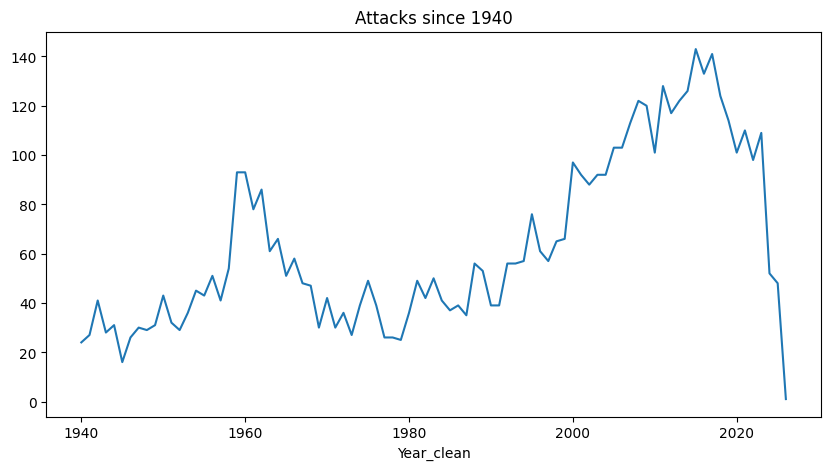

In [43]:
attacks_plot = df_post1940['Year_clean'].value_counts().sort_index()
attacks_plot.plot(kind='line', figsize=(10,5), title='Attacks since 1940')

# visual of Attacks since 1940, seems to be a slight increase over time
# this may bedue to better and more consistent reporting

In [45]:
print(df['Age'].head(20))
print(df['Age'].unique()[:50])

df['Age_clean'] = pd.to_numeric(df['Age'], errors='coerce')

0      ?
1      ?
2     63
3      9
4     39
5     19
6      7
7     85
8      ?
9     69
10    18
11    66
12    21
13    40
14    37
15    16
16    20
17     ?
18    12
19     9
Name: Age, dtype: object
['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30]
